In [1]:
import os

import random
from datetime import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import dask.dataframe as dd

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
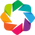

In [3]:
import holoviews as hv
from holoviews import opts
from holoviews.element.tiles import StamenTerrain
hv.extension('bokeh')
import datashader as ds
from datashader import transfer_functions as tf
from datashader.colors import Greys9
import colorcet as cc


from datashader.utils import export_image

Greys9_r = list(reversed(Greys9))[:-2]

from shapely.geometry import Point

#import imageio

In [4]:
df = dd.read_parquet('../data/comed_day/2020_01_29.parquet')

#df['date_time'] = '02/19/2020 ' + df.Time
df['date_time'] = dd.to_datetime(df.date_time ,format='%m/%d/%Y %H%M')
df['residential'] = 1
df['residential'] = df.residential.where(df.service_name.str.contains('RESIDENTIAL'), 0)
df['ZIP_CODE'] = df['zip5'].astype(int) 

#df = df.repartition(npartitions=20)

In [5]:
df_accs = df.groupby(['n_acc', 'residential']).ZIP_CODE.first().reset_index()

In [6]:
df_land_z = gpd.read_file('../data/geo/landuse_zc.geojson')

In [7]:
df_land_z['zip5'] = df_land_z.zip5.astype(int)

In [8]:
zipcodes = df.ZIP_CODE.unique().compute()

In [9]:
df_points = dd.from_pandas(pd.DataFrame(), npartitions=2)

In [10]:
i = 0
N = len(zipcodes)
for zipcode in zipcodes:
    i += 1
    print(f'{i}/{N}')
    df_i = df[df.ZIP_CODE==zipcode].groupby(['n_acc', 'residential']).ZIP_CODE.first().reset_index()
    df_assings = dd.merge(df_i, df_land_z[['id', 'zip5', 'residential']], 
                                                left_on=['ZIP_CODE', 'residential'], right_on=['zip5', 'residential'])
    df_assings = df_assings.sample(frac=1).reset_index(drop=True)
    df_assings = df_assings.groupby('n_acc').id.first().reset_index()
    df_points = dd.concat([df_points, df_assings])
    
    

1/485
2/485
3/485
4/485
5/485
6/485
7/485
8/485
9/485
10/485
11/485
12/485
13/485
14/485
15/485
16/485
17/485
18/485
19/485
20/485
21/485
22/485
23/485
24/485
25/485
26/485
27/485
28/485
29/485
30/485
31/485
32/485
33/485
34/485
35/485
36/485
37/485
38/485
39/485
40/485
41/485
42/485
43/485
44/485
45/485
46/485
47/485
48/485
49/485
50/485
51/485
52/485
53/485
54/485
55/485
56/485
57/485
58/485
59/485
60/485
61/485
62/485
63/485
64/485
65/485
66/485
67/485
68/485
69/485
70/485
71/485
72/485
73/485
74/485
75/485
76/485
77/485
78/485
79/485
80/485
81/485
82/485
83/485
84/485
85/485
86/485
87/485
88/485
89/485
90/485
91/485
92/485
93/485
94/485
95/485
96/485
97/485
98/485
99/485
100/485
101/485
102/485
103/485
104/485
105/485
106/485
107/485
108/485
109/485
110/485
111/485
112/485
113/485
114/485
115/485
116/485
117/485
118/485
119/485
120/485
121/485
122/485
123/485
124/485
125/485
126/485
127/485
128/485
129/485
130/485
131/485
132/485
133/485
134/485
135/485
136/485
137/485
138/485
139/

In [10]:
df_points  = df_points.repartition(npartitions=1000)

In [11]:
df_points.shape[0].compute()

3627527

In [12]:
df_points.to_parquet('../data/geo/points_accounts.parquet')

In [6]:
df_points = dd.read_parquet('../data/geo/points_accounts.parquet').compute()

In [13]:
df_land_z['x'] = df_land_z.geometry.centroid.x
df_land_z['y'] = df_land_z.geometry.centroid.y

/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_40287/1651927857.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_land_z['x'] = df_land_z.geometry.centroid.x
/var/folders/dk/gqlhh1p50lq41knjj1bn1blc0000gn/T/ipykernel_40287/1651927857.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_land_z['y'] = df_land_z.geometry.centroid.y


In [16]:
df_accs_points = pd.merge(df_points.compute(), df_land_z, on='id')[['n_acc', 'residential', 'x', 'y']]
df_accs_points.to_csv('../data/geo/accounts_coordinates.csv')

In [4]:
df_accs_points = pd.read_csv('../data/geo/accounts_coordinates.csv')

In [18]:
all_times = df.date_time.unique().compute()

In [ ]:
df_max = df.groupby('n_acc').energy.max().reset_index().compute()
df_max = df_max.rename(columns={'energy': 'max_energy'})

df = dd.merge(df, df_max, on='n_acc')
df['norm_energy'] = df['energy'] / df['max_energy']

In [ ]:
max_range = 170
min_range = 20

for time in all_times:
    plot_width  = int(700)
    plot_height = int(plot_width//1.2)
    
    df_data = df[(df.date_time==time) & (df.residential==1)].sort_values('ZIP_CODE')[['n_acc', 'energy']].compute()
    df_data = pd.merge(df_data, df_accs_points, on='n_acc')
    
    
    cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
    agg = cvs.points(df_data, 'x', 'y', ds.sum('energy'))
    img = tf.shade(agg, cmap=cc.bmy, how='linear', span=[min_range ,max_range])
    export_image(img=img, filename=str(time).replace(':', ''), fmt=".png", export_path='../outputs/datashader/images')


In [146]:
time = all_times[7]

plot_width  = int(700)
plot_height = int(plot_width//1.2)

df_data = df[(df.date_time==time) & (df.residential==1)].sort_values('ZIP_CODE')[['n_acc', 'norm_energy', 'energy']].compute()
df_data = pd.merge(df_data, df_accs_points, on='n_acc')

df04 = df_data

In [147]:
time = all_times[37]

plot_width  = int(700)
plot_height = int(plot_width//1.2)

df_data = df[(df.date_time==time) & (df.residential==1)].sort_values('ZIP_CODE')[['n_acc', 'norm_energy', 'energy']].compute()
df_data = pd.merge(df_data, df_accs_points, on='n_acc')

df19 = df_data

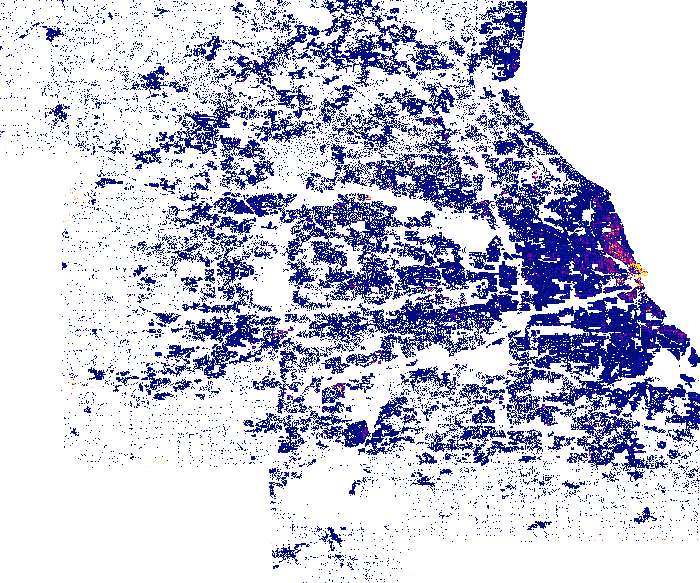

In [249]:
max_range = 170
min_range = 20
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
agg = cvs.points(df04, 'x', 'y', ds.sum('energy'))
img = tf.shade(agg, cmap=cc.bmy, how='linear', span=[min_range ,max_range])
img

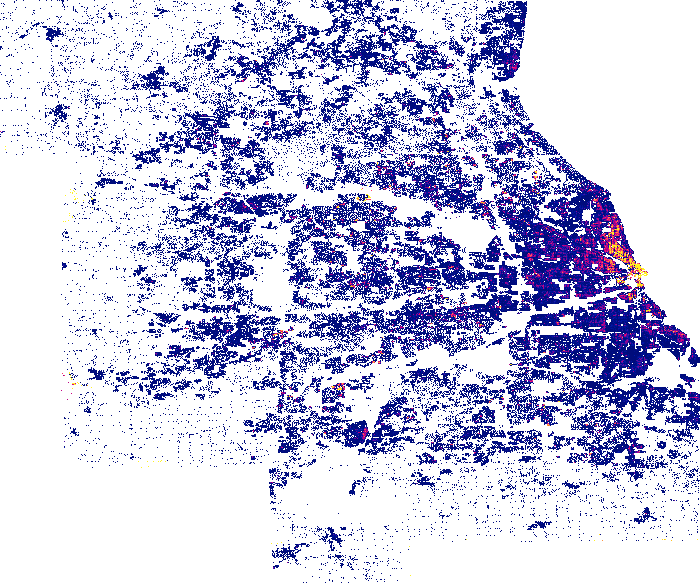

In [250]:
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height)
agg = cvs.points(df19, 'x', 'y', ds.sum('energy'))
img = tf.shade(agg, cmap=cc.bmy, how='linear', span=[min_range ,max_range])
img
#export_image(img=img, filename=str(time).replace(':', ''), fmt=".png", export_path='../outputs/datashader/images')

In [ ]:
filenames = os.listdir('../outputs/datashader/images')
images = []
for filename in filenames:
    images.append(imageio.imread(f'../outputs/datashader/images/{filename}'))
imageio.mimsave('../outputs/datashader/movie/movie.gif', images)